## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  15.334004   134.341888  0.642842   1.507327    87.740490
1  69.440451  1414.437147  0.819342   2.177934  1161.101326
2  52.052468  1523.740135  0.507141  10.783468   774.600479
3  12.553525  1694.855938  0.815974   2.161085  1383.131813
4  55.050098   461.839866  0.764068   3.046012   357.129983


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0037519	total: 73ms	remaining: 1m 12s
1:	learn: 0.9910020	total: 73.6ms	remaining: 36.7s
2:	learn: 0.9815330	total: 74.1ms	remaining: 24.6s
3:	learn: 0.9717985	total: 74.4ms	remaining: 18.5s
4:	learn: 0.9598953	total: 74.9ms	remaining: 14.9s
5:	learn: 0.9477657	total: 75.4ms	remaining: 12.5s
6:	learn: 0.9345714	total: 75.7ms	remaining: 10.7s
7:	learn: 0.9216712	total: 76ms	remaining: 9.42s
8:	learn: 0.9078670	total: 76.4ms	remaining: 8.41s
9:	learn: 0.8956627	total: 76.8ms	remaining: 7.6s
10:	learn: 0.8826484	total: 77.2ms	remaining: 6.94s
11:	learn: 0.8675861	total: 77.5ms	remaining: 6.38s
12:	learn: 0.8555848	total: 77.8ms	remaining: 5.91s
13:	learn: 0.8425639	total: 78.1ms	remaining: 5.5s
14:	learn: 0.8308726	total: 78.4ms	remaining: 5.15s
15:	learn: 0.8211339	total: 78.7ms	remaining: 4.84s
16:	learn: 0.8101034	total: 79ms	remaining: 4.57s
17:	learn: 0.7994347	total: 79.3ms	remaining: 4.33s
18:	learn: 0.7910541	total: 79.7ms	remaining: 4.11s

58:	learn: 0.4740560	total: 94.6ms	remaining: 1.51s
59:	learn: 0.4671546	total: 95.2ms	remaining: 1.49s
60:	learn: 0.4615222	total: 95.6ms	remaining: 1.47s
61:	learn: 0.4554269	total: 96ms	remaining: 1.45s
62:	learn: 0.4508391	total: 96.3ms	remaining: 1.43s
63:	learn: 0.4433798	total: 96.7ms	remaining: 1.41s
64:	learn: 0.4386190	total: 97.1ms	remaining: 1.4s
65:	learn: 0.4329678	total: 97.6ms	remaining: 1.38s
66:	learn: 0.4273137	total: 98ms	remaining: 1.36s
67:	learn: 0.4226322	total: 98.3ms	remaining: 1.35s
68:	learn: 0.4162376	total: 98.8ms	remaining: 1.33s
69:	learn: 0.4104529	total: 99.2ms	remaining: 1.32s
70:	learn: 0.4041147	total: 99.5ms	remaining: 1.3s
71:	learn: 0.4000992	total: 99.7ms	remaining: 1.28s
72:	learn: 0.3965753	total: 100ms	remaining: 1.27s
73:	learn: 0.3921023	total: 101ms	remaining: 1.26s
74:	learn: 0.3882574	total: 101ms	remaining: 1.25s
75:	learn: 0.3833011	total: 101ms	remaining: 1.23s
76:	learn: 0.3774868	total: 102ms	remaining: 1.22s
77:	learn: 0.3725541	to

267:	learn: 0.0632667	total: 183ms	remaining: 501ms
268:	learn: 0.0627973	total: 184ms	remaining: 500ms
269:	learn: 0.0623481	total: 184ms	remaining: 498ms
270:	learn: 0.0618999	total: 185ms	remaining: 497ms
271:	learn: 0.0614682	total: 185ms	remaining: 496ms
272:	learn: 0.0610911	total: 186ms	remaining: 494ms
273:	learn: 0.0606272	total: 186ms	remaining: 493ms
274:	learn: 0.0601372	total: 186ms	remaining: 491ms
275:	learn: 0.0596973	total: 187ms	remaining: 490ms
276:	learn: 0.0592785	total: 187ms	remaining: 489ms
277:	learn: 0.0589084	total: 188ms	remaining: 487ms
278:	learn: 0.0585604	total: 188ms	remaining: 486ms
279:	learn: 0.0581982	total: 188ms	remaining: 485ms
280:	learn: 0.0578265	total: 189ms	remaining: 483ms
281:	learn: 0.0574240	total: 189ms	remaining: 482ms
282:	learn: 0.0570227	total: 190ms	remaining: 480ms
283:	learn: 0.0567611	total: 190ms	remaining: 479ms
284:	learn: 0.0564929	total: 190ms	remaining: 477ms
285:	learn: 0.0561029	total: 191ms	remaining: 476ms
286:	learn: 

477:	learn: 0.0226691	total: 276ms	remaining: 302ms
478:	learn: 0.0226232	total: 277ms	remaining: 301ms
479:	learn: 0.0225497	total: 277ms	remaining: 300ms
480:	learn: 0.0224586	total: 278ms	remaining: 300ms
481:	learn: 0.0223311	total: 278ms	remaining: 299ms
482:	learn: 0.0222497	total: 278ms	remaining: 298ms
483:	learn: 0.0221570	total: 279ms	remaining: 297ms
484:	learn: 0.0221120	total: 279ms	remaining: 297ms
485:	learn: 0.0220435	total: 280ms	remaining: 296ms
486:	learn: 0.0219763	total: 280ms	remaining: 295ms
487:	learn: 0.0219325	total: 281ms	remaining: 295ms
488:	learn: 0.0218331	total: 281ms	remaining: 294ms
489:	learn: 0.0217900	total: 282ms	remaining: 293ms
490:	learn: 0.0217256	total: 282ms	remaining: 292ms
491:	learn: 0.0216044	total: 282ms	remaining: 292ms
492:	learn: 0.0214540	total: 283ms	remaining: 291ms
493:	learn: 0.0213100	total: 283ms	remaining: 290ms
494:	learn: 0.0212150	total: 284ms	remaining: 290ms
495:	learn: 0.0211225	total: 284ms	remaining: 289ms
496:	learn: 

680:	learn: 0.0133673	total: 365ms	remaining: 171ms
681:	learn: 0.0133359	total: 366ms	remaining: 171ms
682:	learn: 0.0133055	total: 366ms	remaining: 170ms
683:	learn: 0.0132856	total: 367ms	remaining: 169ms
684:	learn: 0.0132325	total: 367ms	remaining: 169ms
685:	learn: 0.0132115	total: 368ms	remaining: 168ms
686:	learn: 0.0131850	total: 368ms	remaining: 168ms
687:	learn: 0.0131129	total: 369ms	remaining: 167ms
688:	learn: 0.0130836	total: 369ms	remaining: 167ms
689:	learn: 0.0130661	total: 369ms	remaining: 166ms
690:	learn: 0.0130456	total: 370ms	remaining: 165ms
691:	learn: 0.0129920	total: 370ms	remaining: 165ms
692:	learn: 0.0129729	total: 371ms	remaining: 164ms
693:	learn: 0.0129559	total: 371ms	remaining: 164ms
694:	learn: 0.0129359	total: 371ms	remaining: 163ms
695:	learn: 0.0129216	total: 372ms	remaining: 162ms
696:	learn: 0.0128692	total: 372ms	remaining: 162ms
697:	learn: 0.0128507	total: 373ms	remaining: 161ms
698:	learn: 0.0128312	total: 373ms	remaining: 161ms
699:	learn: 

891:	learn: 0.0068973	total: 458ms	remaining: 55.5ms
892:	learn: 0.0068780	total: 459ms	remaining: 55ms
893:	learn: 0.0068745	total: 459ms	remaining: 54.4ms
894:	learn: 0.0068562	total: 460ms	remaining: 53.9ms
895:	learn: 0.0068275	total: 460ms	remaining: 53.4ms
896:	learn: 0.0068063	total: 460ms	remaining: 52.9ms
897:	learn: 0.0067809	total: 461ms	remaining: 52.3ms
898:	learn: 0.0067601	total: 461ms	remaining: 51.8ms
899:	learn: 0.0067394	total: 462ms	remaining: 51.3ms
900:	learn: 0.0067191	total: 462ms	remaining: 50.8ms
901:	learn: 0.0066961	total: 462ms	remaining: 50.2ms
902:	learn: 0.0066761	total: 463ms	remaining: 49.7ms
903:	learn: 0.0066534	total: 463ms	remaining: 49.2ms
904:	learn: 0.0066296	total: 464ms	remaining: 48.7ms
905:	learn: 0.0066072	total: 464ms	remaining: 48.2ms
906:	learn: 0.0065851	total: 465ms	remaining: 47.6ms
907:	learn: 0.0065775	total: 465ms	remaining: 47.1ms
908:	learn: 0.0065582	total: 465ms	remaining: 46.6ms
909:	learn: 0.0065365	total: 466ms	remaining: 46

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

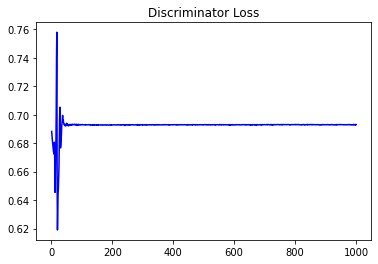

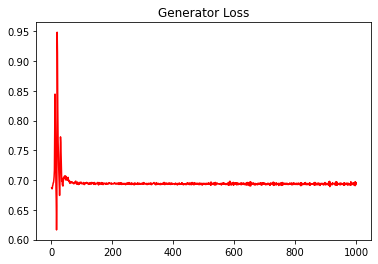

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.00551258463084474


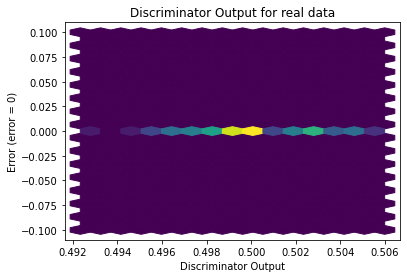

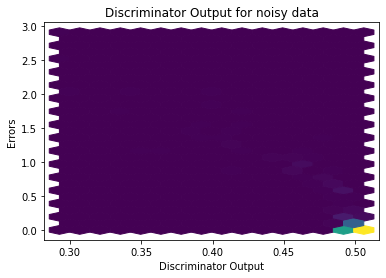

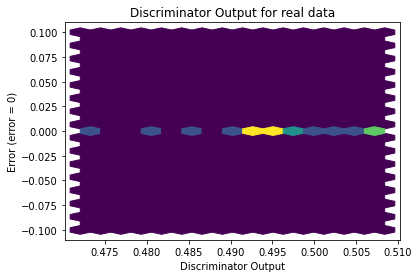

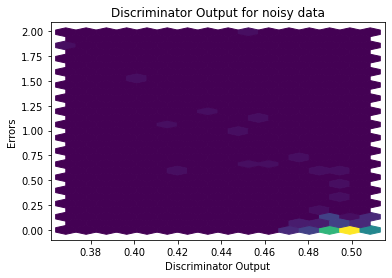

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


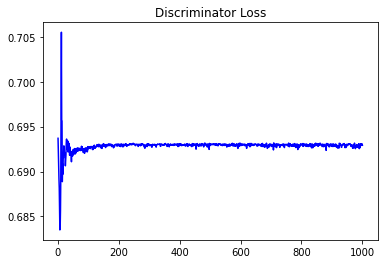

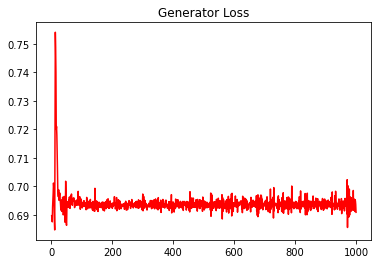

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.007869523210720398


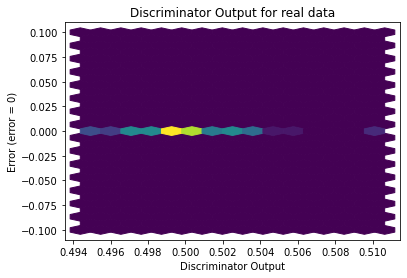

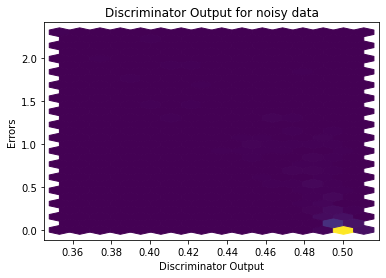

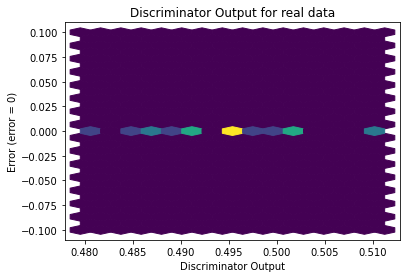

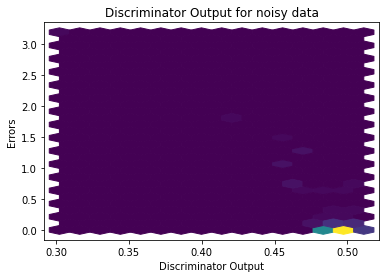

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9105]], requires_grad=True)
